<h1 align="center">Matematicas Discretas - Laboratorio #4</h1>

<A HREF="https://youtu.be/UR2oDYZ-Sao"><img src="img/PnP.png" height="480" width="720"></A>

<h3 align="center"> Haga click en la imagen para ver el video...</h3><br><br>

<div style="text-align: justify">
<font size=4><br><br>
<h3 align="center">Análisis de Complejidad Algorítmica</h3><br><br>
Un  programa  de  computadora,  aun  cuando  se  derive  de  un  algoritmo  correcto,  puede  ser inútil para cierto tipo de entrada ya sea porque el tiempo necesario para correrlo o el espacio requerido para almacenar los datos, las variables del programa, etcétera, son demasiado grandes. El análisis de un algoritmo se refiere al proceso de derivar estimaciones del tiempo y el espacio necesarios para ejecutarlo. En esta sección se aborda el problema de estimar el tiempo requerido para ejecutar el algoritmo<br><br>
    
El tiempo necesario para ejecutar un algoritmo es una función de la entrada. Por lo general, es difícil obtener una fórmula explícita para esta función, y nos conformamos con menos. En lugar de manejar directamente los datos de entrada, se usan parámetros que caracterizan el tamaño de la entrada. Por ejemplo, si la entrada es un conjunto que contiene $n$ elementos, se diría que el tamaño de la entrada es $n$. Tal vez se quiera conocer el tiempo mínimo  necesario  para  ejecutar  el  algoritmo  entre  todas  las  entradas  de  tamaño $n$. Este tiempo se llama tiempo del mejor caso para entradas de tamaño $n$. También  puede pedirse el tiempo máximo necesario para ejecutar el algoritmo entre todas las entradas de tamaño $n$.  Este  tiempo  se  llama tiempo  del  peor caso para  entradas  de  tamaño $n$. Otro  caso importante es el tiempo del caso promedio , es decir, el tiempo necesario para ejecutar el algoritmo para un conjunto finito de entradas todas de tamaño $n$.<br><br>

Como la preocupación principal se refiere a la $estimación$ del tiempo de un algoritmo  en  lugar  del  cálculo  del  tiempo exacto, siempre que se cuenten algunos pasos fundamentales, dominantes del algoritmo, se obtendrán medidas útiles del tiempo. Por ejemplo, si la actividad principal de un algoritmo es hacer comparaciones, como ocurre en una rutina para ordenar, se cuenta el número de comparaciones. Como otro ejemplo, si un algoritmo consiste en un solo ciclo que se ejecuta cuando mucho en
C pasos,  para  alguna constante C, se cuenta el número de iteraciones del ciclo.<br><br><br>

Por  ejemplo, suponga que en el peor caso el tiempo para ejecutar un algoritmo es:<br>
$$t(n) = 60n^2 + 5n + 1$$<br>
para una entrada n bastante grande, el termino $60n^2$ es aproximadamente igual que $t(n)$; sabiendo que $t(n)$ es el tiempo medido en segundos, podemos decir que $T(n) = n^2 + \frac{5}{60}n + \frac{1}{60}$ mide el tiempo del peor caso medido en minutos, se observa que este simple cambio en la unidades no afecta la taza de aumento del tiempo, entonces cuando se describe el incremento en el tiempo del mejor o peor caso conforme aumenta el tamaño de la entrada $n$, se puede ignorar incluso los coeficientes constantes. Con estas suposiciones, $t(n)$ crece como lo hace $n^2$ cuando $n$ se incrementa. Se dice entonces que $t(n)$ es del orden $n^2$ y se escribe como:<br>
$$t(n) = \Theta (n^2)$$
</font>
</div>

<div style="text-align: justify">
<font size=4><br><br>
Para dar una mejor nocion de esto vamos a vizualizar y comparar los tiempos de crecimiento de manera experimental en los siguientes ejemplos de algoritmos de ordenamiento y busqueda, haciendo uso de python para codificar y medir el tiempo de ejecución en diferentes casos(mejor caso, peor caso y caso promedio):<br><br><br>
    
1. Algoritmo de ordenamiento Burbuja:
</font>
</div>

In [4]:
from pytictoc import TicToc
import random as rd
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import numpy as np

In [5]:
t = TicToc() #se crea una instancia de la clase para el tiempo de ejecución

In [42]:
def bubbleSort(alist):                                 #definición de la función bubble-sort midiendo tiempos en cada iteración
    Tlist = []
    for passnum in range(len(alist)-1,0,-1):
        t.tic()                                        #Aqui empieza la medición de tiempo de la iteración
        for i in range(passnum):
            if alist[i] > alist[i + 1]:
                temp = alist[i]
                alist[i] = alist[i + 1]
                alist[i + 1] = temp                    #La función t.tocvalue() retorna el valor del tiempo medido en cada iteración
        Tlist.append(t.tocvalue())                     #Aqui termina la medición de tiempo de la iteración
    return Tlist                                       #retorna una lista con los tiempos que se tardó para cada iteración del algoritmo

                
#Se probaran los algoritmos con listas de 1.000 números enteros generadas aleatoriamente para calcular el caso promedio.
#Para el mejor caso se usara una lista ya ordenada de 1.000 números y para el peor de los casos la misma lista ordenada inversamente.

listaEjec = []
for i in range(10):
    listaEjec.append(rd.sample(range(1000), 1000))
                
#ListaEjec son las ejecuciones que se van a realizar
#cada elemento en la lista es una lista que va de 0 - 1.000 y esta ordenada de forma aleatoria   


listaOrd = []
for i in range(1000):
    listaOrd.append(i)
    
#listaOrd es una lista de números de 0 - 1.000 ordenada de forma ascendente

listaDescOrd = []
listaDescOrd[:] = listaOrd
listaDescOrd.sort(reverse = True)

#listaDescOrd es listOrd ordenada inversamente, es decir, de manera descendente

In [43]:
#PRUEBA DEL MEJOR Y PEOR CASO:

listaTiMejor = bubbleSort(listaOrd)        #lista de tiempos para el mejor caso
listaTiPeor = bubbleSort(listaDescOrd)     #lista de tiempos para el peor caso
listaOrd.pop()
listaDescOrd.pop()

999

In [44]:
#PRUEBA DEL CASO PROMEDIO:
#En esta celda se prueba el bubble sort para todas las listas creadas en la celda anterior, tomando el tiempo de ejecucion con TICTOC
listaTiempos = []
for i in listaEjec:                         #prueba del caso promedio
    listaTiempos.append(bubbleSort(i))
    
#listaPromTiempos calcula el promedio de cada tiempo tomado por cada iteración para ordenar
listaPromTiempos = [(a + b + c + d + e + f + g + h + i + j)/10 for a, b, c, d, e, f, g, h, i, j in zip(*listaTiempos)]

In [45]:
#REORDENAMIENTO DE LAS LISTAS DE TIEMPOS

listaPromTiempos.sort()
listaTiMejor.sort()
listaTiPeor.sort()

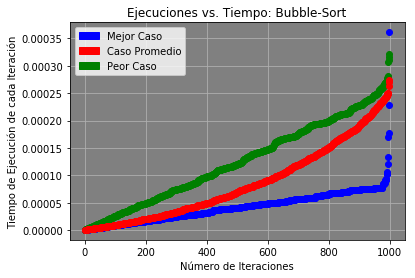

In [47]:
#Teniendo la lista promedio de tiempos entonces podemos proceder a plotear los resultados...
plt.axes(facecolor = 'gray')
plt.plot(listaOrd, listaTiMejor, 'bo')                        #se plotean cada una de los vectores de tiempos generados
plt.plot(listaOrd, listaTiPeor, 'go')
plt.plot(listaOrd, listaPromTiempos, 'ro')                    
plt.xlabel('Número de Iteraciones')                           #título del eje x
plt.ylabel('Tiempo de Ejecución de cada Iteración')           #título del eje y
plt.title('Ejecuciones vs. Tiempo: Bubble-Sort')              #muestra el título
plt.grid(True)                                                #muestra la cuadrícula
blueP = mpat.Patch(color='blue', label='Mejor Caso')          #definición de cada leyenda
redP = mpat.Patch(color='red', label='Caso Promedio')
greenP = mpat.Patch(color='green', label='Peor Caso')         
plt.legend(handles=[blueP, redP, greenP])                     #plotea la leyenda del gráfico
plt.show()

<div style="text-align: justify">
<font size=4><br><br>
    
2. Algoritmo de ordenamiento QuickSort:
</font>
</div>

In [33]:
#DEFINICIÓN DE LAS FUNCIONES PARA EL QUICKSORT

def particion(lista, izq, der):
	global comparaciones
	pivote = lista[der]
	indice = izq

	for i in range(izq, der):
		comparaciones += 1
		
		if lista[i] <= pivote:
			lista[indice], lista[i] = lista[i], lista[indice]
			indice += 1

	lista[indice], lista[der] = lista[der], lista[indice]
	return indice

def quicksort(lista, izq, der, listaTiempos):
    if izq < der:
    	pivote_indice = particion(lista, izq, der)
    	quicksort(lista, izq, pivote_indice-1, listaTiempos)
    	quicksort(lista, pivote_indice+1, der, listaTiempos)
    listaTiempos.append(t.tocvalue())                               #Se guarda el tiempo de cada iteración

In [49]:
#SE REINICIAN LAS LISTAS PARA REALIZAR LA EJECUCIÓN DE SUS RESPECTIVOS QUICKSORTS
listaEjec = []
for i in range(10):
    listaEjec.append(rd.sample(range(1000), 1000))

#ListaEjec son las ejecuciones que se van a realizar
#cada elemento en la lista es una lista que va de 0 - 1.000 y esta ordenada de forma aleatoria

listaOrd = []
for i in range(1000):
    listaOrd.append(i)
    
#listaOrd es una lista de números de 0 - 1.000 ordenada de forma ascendente

listaDescOrd = []
listaDescOrd[:] = listaOrd
listaDescOrd.sort(reverse = True)

#listaDescOrd es listOrd ordenada inversamente, es decir, de manera descendente

In [50]:
#PRUEBA MEJOR CASO QUICKSORT
comparaciones = 0
listaTiMejor = []
t.tic()
quicksort(listaOrd, 0, len(listaOrd)-1, listaTiMejor)

In [51]:
#PRUEBA PEOR CASO QUICKSORT
comparaciones = 0
listaTiPeor = []
t.tic()
quicksort(listaDescOrd, 0, len(listaDescOrd)-1, listaTiPeor)

In [52]:
#PRUEBA CASO PROMEDIO QUICKSORT
listaTiempos = []
for i in listaEjec:
    comparaciones = 0
    listaT = []
    t.tic()
    quicksort(i, 0, len(i)-1, listaT)
    listaTiempos.append(listaT)
    
    
#Cálculo del promedio de los tiempos
listaPromTiempos = [(a + b + c + d + e + f + g + h + i + j)/10 for a, b, c, d, e, f, g, h, i, j in zip(*listaTiempos)]

In [53]:
#LISTAS CON EL NÚMERO DE ITERACIONES PARA CADA CASO
cantItMej = []
cantItPeor = []
cantItProm = []
for i in range(len(listaTiMejor)):
    cantItMej.append(i)
    
for i in range(len(listaTiPeor)):
    cantItPeor.append(i)
    
for i in range(len(listaPromTiempos)):
    cantItProm.append(i)

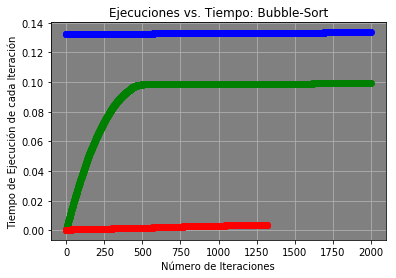

In [55]:
#Teniendo la lista promedio de tiempos entonces podemos proceder a plotear los resultados...
plt.axes(facecolor = 'gray')
plt.plot(cantItMej, listaTiMejor, 'bo')                        #se plotean cada una de los vectores de tiempos generados
plt.plot(cantItPeor, listaTiPeor, 'go')
plt.plot(cantItProm, listaPromTiempos, 'ro')                    
plt.xlabel('Número de Iteraciones')                           #título del eje x
plt.ylabel('Tiempo de Ejecución de cada Iteración')           #título del eje y
plt.title('Ejecuciones vs. Tiempo: Bubble-Sort')              #muestra el título
plt.grid(True)                                                #muestra la cuadrícula
blueP = mpat.Patch(color='blue', label='Mejor Caso')          #definición de cada leyenda
redP = mpat.Patch(color='red', label='Caso Promedio')
greenP = mpat.Patch(color='green', label='Peor Caso')         
#plt.legend(handles=[blueP, redP, greenP])                     #plotea la leyenda del gráfico
plt.show()